## Homework 2, Problem 3 on real neural data.

ECE C143A/C243A, Fall Quarter 2025-26, Prof. J.C. Kao, TAs M.Y. Turali, S. Athreya


 We will analyze real neural data recorded using a 100-electrode
  array in premotor cortex of a macaque monkey(The neural
    data have been generously provided by the laboratory of
    Prof. Krishna Shenoy at Stanford University.  The data are to be
    used exclusively for educational purposes in this course.).  The
  dataset can be found on CCLE as `ps3_data.mat`.
  
  
  The following describes the data format.  The .mat file has a single
  variable named *trial*, which is a structure of dimensions (182
  trials) $\times$ (8 reaching angles).  The structure contains spike
  trains recorded from a single neuron while the monkey reached 182
  times along each of 8 different reaching angles (where the trials of
  different reaching angles were interleaved).  The spike train for
  the *n*th trial of the *k* th reaching angle is contained in
  *trial(n,k).spikes*, where *n* $\;=1,\dots,182$ and * k*$\;=1,\ldots,8$.  The indices *k *$\;=1,\ldots,8$ correspond
  to reaching angles $\frac{30}{180}\pi$, $\frac{70}{180}\pi$,
  $\frac{110}{180}\pi$, $\frac{150}{180}\pi$, $\frac{190}{180}\pi$,
  $\frac{230}{180}\pi$, $\frac{310}{180}\pi$, $\frac{350}{180}\pi$,
  respectively.  The reaching angles are not evenly spaced around the
  circle due to experimental constraints that are beyond the scope of
  this homework.

  A spike train is represented as a sequence of zeros and ones, where
  time is discretized in 1 ms steps.  A zero indicates that the neuron
  did not spike in the 1 ms bin, whereas a one indicates that the
  neuron spiked once in the 1 ms bin.  Due to the refractory period,
  it is not possible for a neuron to spike more than once within a
  1 ms bin.  Each spike train is 500 ms long and is, thus, represented
  by a 1 $\times$ 500 vector.
  
  We load this data for you using the `sio` library.  Be sure that `ps3_data.mat` is in the same directory as this notebook / on the system path.  If you prefer to have it on a different path, specify it in the `sio.loadmat` command.

In [178]:
"""
ECE C143/C243 Homework-3 Problem-4

"""

# Importing the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp
import scipy.special
import scipy.io as sio

# Importing the Matlab data
data = sio.loadmat('ps3_data.mat') # load the .mat file.
num_trials = data['trial'].shape[0]
print(num_trials)
num_cons = data['trial'].shape[1]
print(num_cons)

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

182
8
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (6 points) Spike trains
Generate the `spike_times` matrix for the real data.  This should have the same `spike_times` format described in problem 2.  The following code, when complete, will plot 5 spike trains for each reaching angle in the same format as shown in Figure 1.6(A) in *TN*.  To simplify the plotting

In [179]:
train = data['trial'][12, 5]['spikes'][0]
#train = train.tolist()
train #THE DATA FORMAT JUST LOOKS STRANGE BECAUSE YOU ARE LOOKING AT A NUMPY ARRAY IT TELLS YOU A LOT OF INFORATION ABOUT THE VAR WHEN YOU PRINT. 
      #DATA NOT ACTUALLY STORED LIKE THAT ITS JUST AN ARRAY!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [180]:
train[96] #SINCE DATA IN NUMPY ARRAY, EVEN WHEN YOU TRY TO PRINT ONE ELEMENT IT TELLS YOU THE DATA TYPE. THIS IS JUST HOW IT IS PRINTED.

np.uint8(1)

In [181]:
np.where(train == 1)

(array([ 96, 124, 155, 162, 189, 234]),)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/cw/197yyjc956n9pn16fs3z00wm0000gn/T/ipykernel_15413/3741314806.py:8: SyntaxWarning: invalid escape sequence '\p'
  s_labels = ['30$\pi$/180', '70$\pi$/180', '110$\pi$/180', '150$\pi$/180'

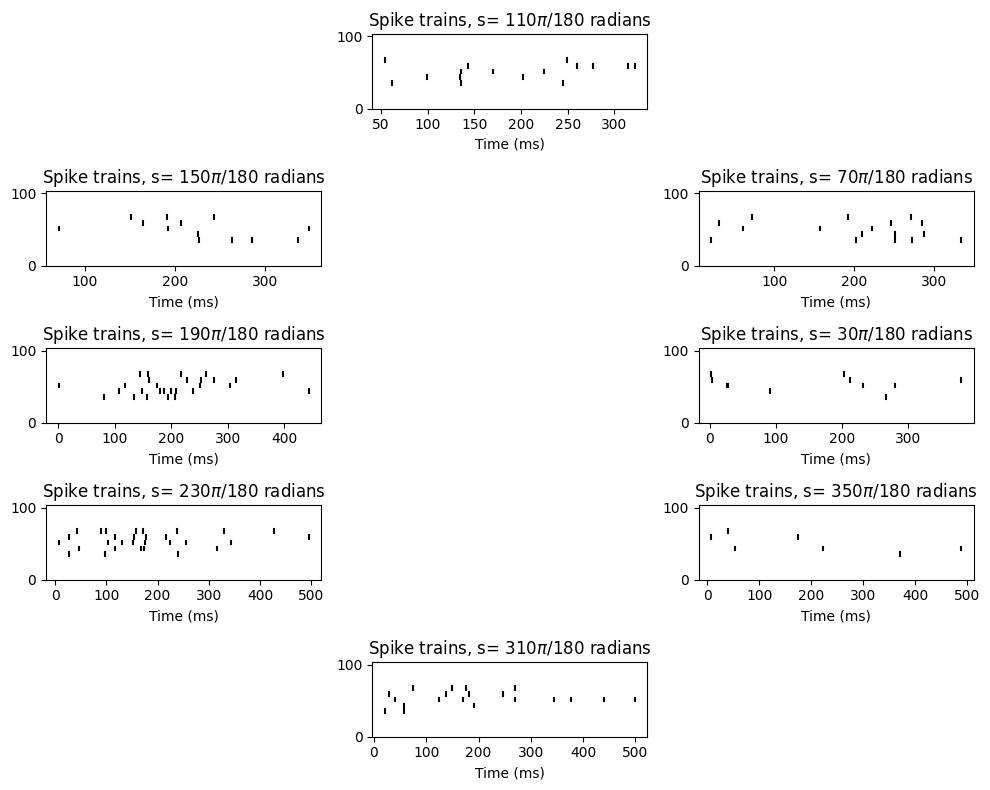

In [182]:
## 4a

T = 500; #trial length (ms)

num_rasters_to_plot = 5; # per reaching angle

s = np.pi*np.array([30.0/180,70.0/180,110.0/180 ,150.0/180 ,190.0/180 ,230.0/180 ,310.0/180 ,350.0/180]) # radians
s_labels = ['30$\pi$/180', '70$\pi$/180', '110$\pi$/180', '150$\pi$/180', '190$\pi$/180',
            '230$\pi$/180', '310$\pi$/180', '350$\pi$/180']

# These variables help to arrange plots around a circle
num_plot_rows = 5
num_plot_cols = 3
subplot_indx = [9, 6, 2, 4, 7, 10, 14, 12]

# Initialize the spike_times array
spike_times = np.empty((num_cons, num_trials), dtype=list)

plt.figure(figsize=(10,8))
for con in range(num_cons):
    for rep in range(num_trials):
        #====================================================#
        # YOUR CODE HERE:
        #   Calculate the spike trains for each reaching angle.
        #   You should calculate the spike_times array that you 
        #   computed in problem 2.  This way, the following code
        #   will plot the histograms for you.
        #====================================================#  
        train = data['trial'][rep, con]['spikes'][0] 
        #PlotSpikeRaster function needs a list of times of when the spikes happen. Simulated data does this by default. To tell when spikes happen in the 
        #actual data we can use the index of when the spike happend because we know each entry is 1ms apart. So using np.where we can find all the indecies
        #where a spike happened and that will represent also the time in ms when the spike happend.
        spike_times[con, rep] = np.where(train == 1)[0]
        #====================================================#
        # END YOUR CODE
        #====================================================# 

    plt.subplot(num_plot_rows, num_plot_cols, subplot_indx[con])
    nsp.PlotSpikeRaster(spike_times[con, 0:num_rasters_to_plot])
    plt.title('Spike trains, s= '+s_labels[con]+' radians')
    plt.tight_layout()


### (b) (4 points) Spike histogram
For each reaching angle, find the spike histogram by taking spike counts in non-overlapping 20~ms bins, then averaging across the 182 trials.  The spike histograms should have firing rate (in spikes / second) as the vertical axis and time (in msec, not time bin index) as the horizontal axis.  Plot the histogram for 500ms worth of data.  Plot the 8 resulting spike histograms around a circle, as in part (a).

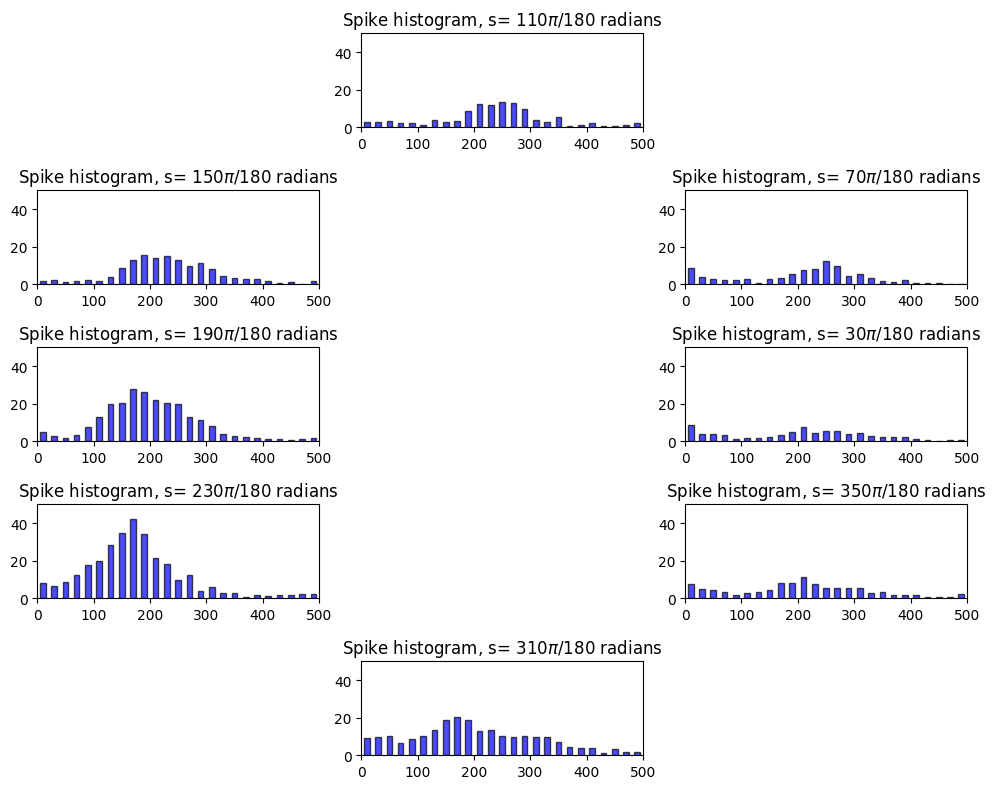

In [183]:
## 4b
bin_width = 20 # (ms)
bin_centers = np.arange(bin_width/2,T,bin_width) # (ms)
plt.figure(figsize=(10,8))
max_t = 500 # (ms)
max_rate = 50 # (in spikes/s)

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the spike histogram
    #====================================================# 
    bins_total = int(T/bin_width)
    bin_store = [0] * (bins_total)
    for rep in range(num_trials):
        l_b = 0
        u_b = l_b + bin_width
        bin = 0
        train = data['trial'][rep, con]['spikes'][0]
        while u_b <= T:
            bin_sum = np.sum(train[l_b:u_b])
            bin_store[bin] += bin_sum
            bin += 1
            l_b = u_b
            u_b = l_b + bin_width
    bin_store = np.array(bin_store) / num_trials
    firing_rates = np.array(bin_store) / (bin_width/1000)
    plt.bar(bin_centers, firing_rates, width=(bin_width/2), color='blue', edgecolor='black', alpha=0.7)

    #====================================================#
    # END YOUR CODE
    #====================================================# 
    plt.axis([0, max_t, 0, max_rate])
    plt.title('Spike histogram, s= '+s_labels[con]+' radians')
    plt.tight_layout()



### (c) (3 points) Tuning curve
For each trial, count the number of spikes across the entire trial.  Plots these points on the axes shown in Figure 1.6(B) in *TN*.  There should be $182\cdot 8$ points in the plot (but some points may be on top of each other due to the discrete nature of spike counts). For each reaching angle, find the mean firing rate across the 182 trials, and plot the mean firing rate using a red point on the same plot. 
Then, fit the cosine tuning curve \eqn{tuning} to the 8 red points by minimizing the sum of squared errors
    \begin{align}
      \sum_{i=1}^8\big(\lambda(s_i) - r_0 - (r_\text{max} -
      r_0)\cos(s_i-s_\text{max})\big)^2 \nonumber
    \end{align}
with respect to the parameters $r_0$, $r_\text{max}$, and $s_\text{max}$.  (Hint: this can be done using linear regression; refer to Homework \# 2.) Plot the resulting tuning curve of this neuron in green on the same plot.

Text(0.5, 1.0, 'Firing rates, mean firing rate and tuning curve')

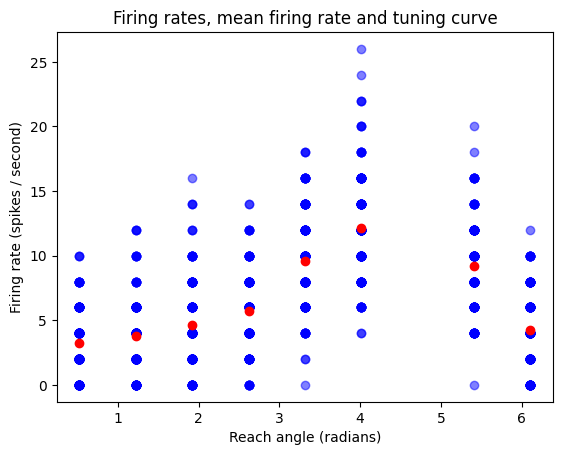

In [184]:
#====================================================#
# YOUR CODE HERE:
# Tuning curve. Please use the following colors for plot:
# Firing rates(blue);Mean firing rate(red); Cosine tuning curve(green)
#====================================================#  
all_points = []
mean_firing_rates = []
for con in range(num_cons):
    cond_rates = []
    for rep in range(num_trials):
        trial = data['trial'][rep, con]['spikes'][0]
        count = np.sum(trial)
        firing_rate = count / (T/1000)
        cond_rates.append(firing_rate)
    all_points.append(cond_rates)
for i, angle in enumerate(s):
    angle_arr = np.full_like(np.array(all_points[i]), angle)
    plt.scatter(angle_arr, all_points[i], color='Blue', alpha=0.5)
    mean_firing_rates.append(np.mean(all_points[i]))
plt.scatter(x=s, y=mean_firing_rates, color='red')
#tuning = r_0 + (r_max-r_0)*np.cos(s-s_max)

'''
Find the tuning curve: #TODO

From Math portion of HW we know tuning curve formula:
f(x) = C0 + C1cos(Theta - Theta0)
r_0 + (r_max-r_0)*np.cos(s-s_max) = c_0 + c_1cos(theta - theta_0)

(r_0) = (c_0) = k_0
(r_max - r_0) = (c_1)
    (r_max) = (c_1 + r_0)
(s_max) = (theta_0)

'''






#====================================================#
# END YOUR CODE
#====================================================# 
plt.xlabel('Reach angle (radians)')
plt.ylabel('Firing rate (spikes / second)')
plt.title('Firing rates, mean firing rate and tuning curve')


In [185]:
print(s)

[0.52359878 1.22173048 1.91986218 2.61799388 3.31612558 4.01425728
 5.41052068 6.10865238]


### (d) (5 points) Count distribution
For each reaching angle, plot the normalized distribution of spike counts (using the same counts from part (c)).  Plot the 8 distributions around a circle, as in part (a).  Fit a Poisson distribution to each empirical distribution and plot it on top of the corresponding empirical distribution.

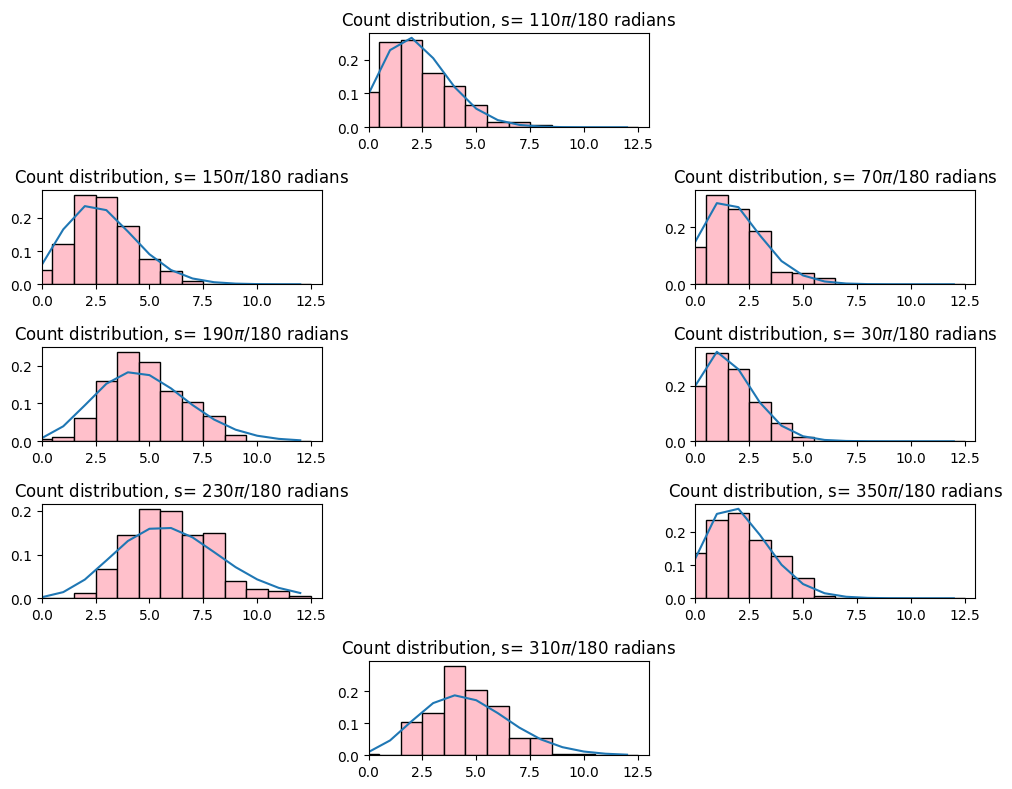

In [186]:
from scipy.stats import poisson

plt.figure(figsize=(10,8))
max_count = 13
spike_count_bin_centers =  np.arange(-0.5,max_count+0.5,1)

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])

    #====================================================#
    # YOUR CODE HERE:
    #   Find the empirical mean of the poission distribution
    #   and calculate the Poisson distribution.
    #====================================================#  

    con_counts = []
    for rep in range(num_trials):
        trial = data['trial'][rep, con]['spikes'][0]
        count = np.sum(trial)
        con_counts.append(count)
    hist_counts, bins =  np.histogram(con_counts, bins=spike_count_bin_centers, density=True)
    bin_centers = (bins[:-1]+bins[1:]) / 2
    plt.hist(con_counts, spike_count_bin_centers, color="pink", density=True, edgecolor='black')
    #plt.bar(bin_centers, hist_counts, color='blue', edgecolor='black')
    poisson_mean = mean_firing_rates[con] * (T/1000) # make sure mean is terms of count (UNITS)
    poisson_distr = poisson.pmf(bin_centers, poisson_mean)
    plt.plot(bin_centers, poisson_distr)
    #====================================================#
    # END YOUR CODE
    #====================================================# 
    
    
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the empirical distribution of spike counts and the 
    #   Poission distribution you just calculated
    #====================================================#  


    #====================================================#
    # END YOUR CODE
    #====================================================# 
    plt.xlim([0, max_count])
    plt.title('Count distribution, s= '+ s_labels[con]+' radians')
    plt.tight_layout()  


#### Question:
Why might the empirical distributions differ from the idealized Poisson distributions?

#### Your answer:

### (e) (3 points) Fano factor
For each reaching angle, find the mean and variance of the spike counts across the 182 trials (using the same spike counts from part (c)).  Plot the obtained mean and variance on the axes shown in Figure 1.14(A) in *TN*.  There should be 8 points in this plot -- one per reaching angle.

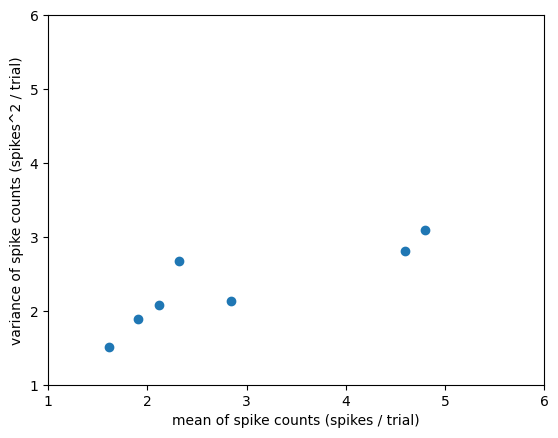

In [187]:
## 4e

#====================================================#
# YOUR CODE HERE:
# Plot the mean and variance of spike counts on the axes
#====================================================#
means = []
vars = []
for con in range(num_cons):
    con_counts = []
    for rep in range(num_trials):
        trial = data['trial'][rep, con]['spikes'][0]
        count = np.sum(trial)
        con_counts.append(count)
    con_counts = np.array(con_counts)
    means.append(np.mean(con_counts))
    vars.append(np.var(con_counts))
    
plt.scatter(means, vars)
#====================================================#
# END YOUR CODE
#====================================================#
plt.ylim(1,6)
plt.xlim(1,6)
plt.xlabel('mean of spike counts (spikes / trial)')
plt.ylabel('variance of spike counts (spikes^2 / trial)')
plt.show()

#### Question: 
  Do these points lie near the 45 deg diagonal, as would be expected of a Poisson distribution?

#### Your answer: No.

### (f) (4 points) Interspike interval (ISI) distribution
For each reaching angle, plot the normalized distribution of ISIs. Plot the 8 distributions around a circle, as in part (a). Fit an exponential distribution to each empirical distribution and plot it on top of the corresponding empirical distribution.

Iter: [np.int64(267), np.int64(92), np.int64(26), np.int64(2), np.int64(204), np.int64(48), np.int64(4), np.int64(209), np.int64(168), np.int64(2), np.int64(201), np.int64(226), np.int64(180), np.int64(57), np.int64(9), np.int64(130), np.int64(118), np.int64(65), np.int64(39), np.int64(243), np.int64(249), np.int64(30), np.int64(177), np.int64(17), np.int64(221), np.int64(216), np.int64(53), np.int64(168), np.int64(153), np.int64(102), np.int64(64), np.int64(62), np.int64(185), np.int64(50), np.int64(46), np.int64(47), np.int64(108), np.int64(150), np.int64(4), np.int64(287), np.int64(192), np.int64(9), np.int64(51), np.int64(137), np.int64(85), np.int64(15), np.int64(207), np.int64(59), np.int64(148), np.int64(19), np.int64(4), np.int64(31), np.int64(70), np.int64(149), np.int64(37), np.int64(31), np.int64(167), np.int64(270), np.int64(97), np.int64(84), np.int64(53), np.int64(5), np.int64(164), np.int64(68), np.int64(10), np.int64(2), np.int64(33), np.int64(143), np.int64(59), np.int

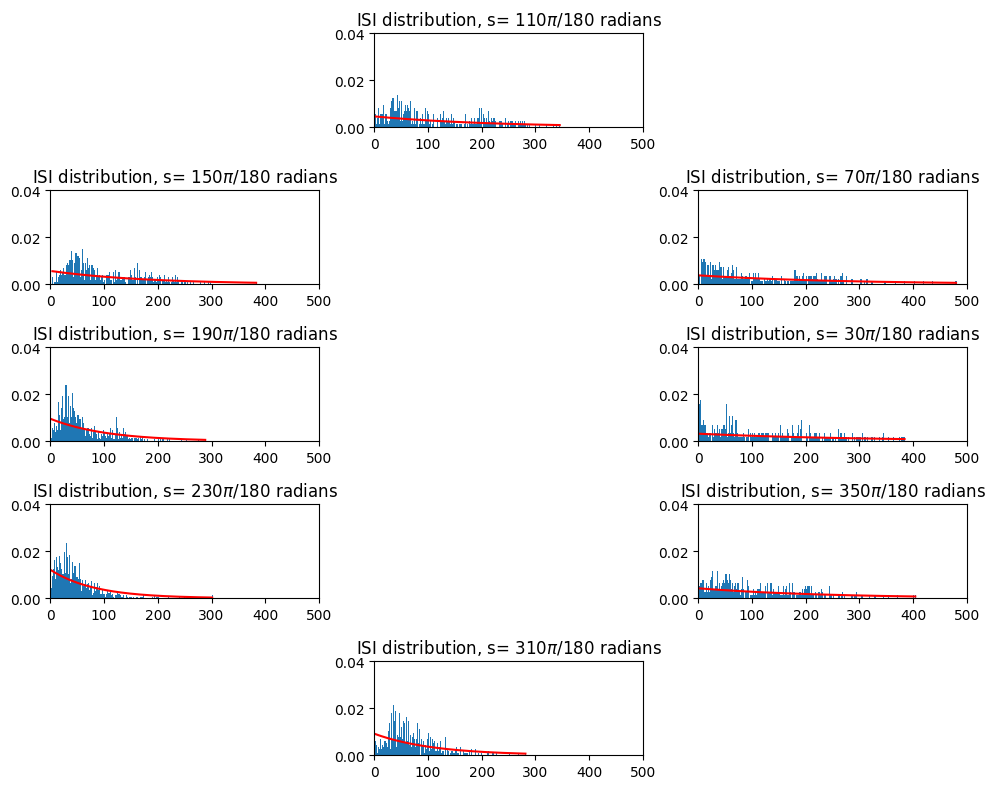

In [200]:
## 4f
from scipy.stats import expon

plt.figure(figsize=(10,8))
num_ISI_bins = 200
for con in range(num_cons) :
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the interspike interval (ISI) distribution and
    #   an exponential distribution with rate given by the inverse
    #   of the mean ISI.
    #====================================================#
    ISIs = []
    for rep in range(num_trials):
        spikes = spike_times[con, rep]
        spikes = np.insert(spikes, 0, 0)
        ISIs.extend(np.diff(spikes))
    print("Iter:",ISIs)
    counts, bins = np.histogram(ISIs, bins=num_ISI_bins, density=True)
    plt.hist(ISIs, bins=num_ISI_bins, density=True)
    centers = (bins[:-1]+bins[1:]) / 2
    expo_mean = 1/(mean_firing_rates[con]) * 1000 #make sure the mean is in terms of miliseconds just like the ISIs (UNITS). rates stored as spikes/sec so need to convert to miliseconds
    expo_distr = expon.pdf(centers,loc=0, scale=expo_mean)
    plt.plot(centers, expo_distr, color='red')
    #====================================================#
    # END YOUR CODE
    #====================================================#
    plt.title('ISI distribution, s= '+ s_labels[con]+' radians')    
    plt.axis([0, max_t, 0, 0.04])
    plt.tight_layout() 


### Question: 
 Why might the empirical distributions differ from the idealized exponential distributions?

#### Your answer: